In [214]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os 
from random import randrange
import copy

In [215]:
verbose=True
number=90
# dict={"image_name": "IMG_0587.JPG", "points": [[2883, 1253], [1950, 646], [1693, 285], [1933, 2063], [1665, 2064], [3852, 607], [4090, 224], [3878, 2063], [4129, 2065]], "size": [305, 230, 130]}

In [216]:

back="/apollo/mle/Datasets/backgrounds/"
background=[cv2.imread(back+"background1.png"), cv2.imread(back+ "background2.png")]
backgrounds=[]
for b in background:
    backgrounds.append(cv2.resize(b, [5472, 3648]))
# plt.imshow(backgrounds[0])
# plt.show()
# plt.imshow(backgrounds[1])
# plt.show()


In [217]:
image_path="/apollo/mle/Datasets/boxes/"
images=os.listdir(image_path)
images=sorted(images)

img=image_path+images[number]
print(img)

/apollo/mle/Datasets/boxes/IMG_0725.JPG


In [218]:
import json
with open("data/outf_all/ford/order_train_size_correct.json", 'r') as f:
        data=json.load(f)
points=[]
for dict in data:
    if dict["image_name"]==img.split("/")[-1]:
        points=dict["points"]
        break
print(points)

[[2590, 1882], [1447, 723], [1028, 365], [1463, 3043], [1049, 3439], [3752, 707], [4082, 343], [3768, 3027], [4104, 3418]]


In [219]:
# # size=[1024,1024]
# image=cv2.imread(img)
# # image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# # plt.imshow(image)
# # plt.show()
# # image=cv2.resize(image)
# image= cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# original=image.copy()


# min_color=np.array([60,80,0])
# max_color= np.array([165, 256, 256])
# mask = cv2.inRange(image,min_color, max_color )
# masked = cv2.bitwise_and(image,image, mask=mask)
# result= cv2.cvtColor(image-masked, cv2.COLOR_HSV2RGB)
# plt.imshow(result)
# plt.show()

In [220]:
# def get_background_crop(backgrounds, matrix):
#     # select a background:
#     select=randrange(0, len(backgrounds))
#     x, y, c = backgrounds[select].shape
#     x1 = randrange(0, x - matrix)
#     y1 = randrange(0, y - int(matrix*0.66))

#     return backgrounds[select][x1:x1+ matrix, y1:y1+int(matrix*0.66),:]
    

In [221]:
# # random crop 60*6 square from background
# h,w, c=result.shape

# for i in range(0,2):
#     matrix=randrange(1000, 3000)
#     cropje=get_background_crop(backgrounds, matrix)
#     cropje=cv2.resize(cropje, [w, h])
#     masked = cv2.bitwise_and(cropje,cropje, mask=mask)
#     plt.imshow(masked+result)
#     plt.show()

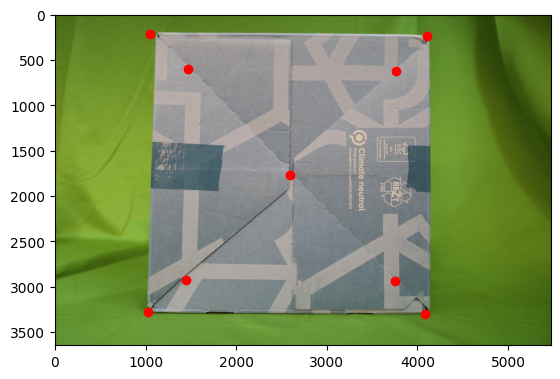

In [233]:
image=cv2.imread(img)
plt.imshow(image)

for p in points:
    plt.plot(p[0],3648-p[1], 'ro')
plt.show()


In [234]:
# invert points: 
new_points=[]
for p in points:
    new_points.append([p[0],3648-p[1]])


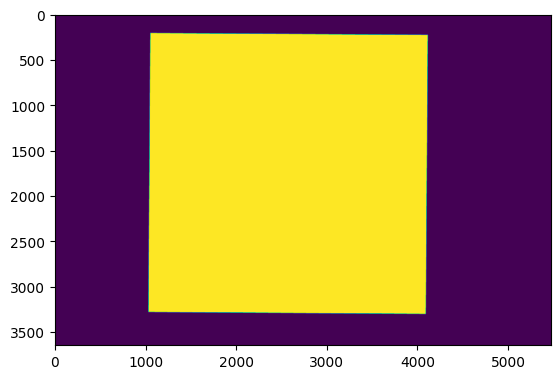

In [245]:
cimg = np.zeros_like(image)
hull = cv2.convexHull(np.array(new_points))
cv2.drawContours(cimg, [hull], -1, (255,255,255), -1)
cimg=cimg[:,:,0]
plt.imshow(cimg)
plt.show()

In [ ]:
back="/apollo/mle/Datasets/backgrounds/"
background=[cv2.imread(back+"background1.png"), cv2.imread(back+ "background2.png")]
backgrounds=[]
for b in background:
    backgrounds.append(cv2.resize(b, [3840, 2160]))

In [ ]:
def rescale_points(cropsize, points):
    x_max = 5472.0
    y_max=3648.0
    new_points=[]
    for p in points:
        p_x=int((p[0]/x_max)*cropsize)
        p_y=int((p[1]/y_max)*(cropsize*0.66))
        new_points.append([p_x, p_y])
    return np.array(new_points)
    

In [ ]:
def get_background_crop_video(backgrounds, matrix):
    # select a background:
    select=randrange(0, len(backgrounds))
    h,w, c = backgrounds[select].shape
    h1 = randrange(0, h - int(matrix*0.66))
    w1 = randrange(0, w - matrix)

    return copy.deepcopy(backgrounds[select]), h1, w1 

In [ ]:
# random background
# for i in range(0, 5):
image=cv2.imread(img)
cropsize =randrange(700, 2048 )
background, h1, w1 = get_background_crop_video(backgrounds, cropsize)
crop=background[h1:h1+int(cropsize*0.66),w1:w1+cropsize,:]
# create correct crop
    # image=cv2.resize(image, [cropsize, int(cropsize*0.66)])
    # image= cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # min_color=np.array([60,80,0])
    # max_color= np.array([165, 256, 256])
    # mask = cv2.inRange(image,min_color, max_color )
    # masked = cv2.bitwise_and(image,image, mask=mask)
    # result= cv2.cvtColor(image-masked, cv2.COLOR_HSV2RGB)

    # masked = cv2.bitwise_and(crop,crop, mask=mask)
    # cutout=masked+result
    # # plt.imshow(cutout)
    # # plt.show()
    # background[h1:h1+int(cropsize*0.66),w1:w1+cropsize,:]=cutout
    # plt.imshow(background)
    # plt.show()

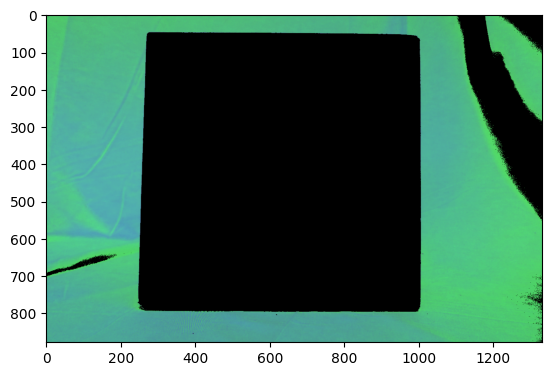

In [ ]:
# create correct crop
image=cv2.resize(image, [cropsize, int(cropsize*0.66)])
image= cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
min_color=np.array([60,100,100])
max_color= np.array([165, 256, 256])
mask = cv2.inRange(image,min_color, max_color )
masked = cv2.bitwise_and(image,image, mask=mask)
plt.imshow(masked)
plt.show()




In [ ]:
(cnts, _) = cv2.findContours(masked.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
c = max(cnts, key = cv2.contourArea)

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


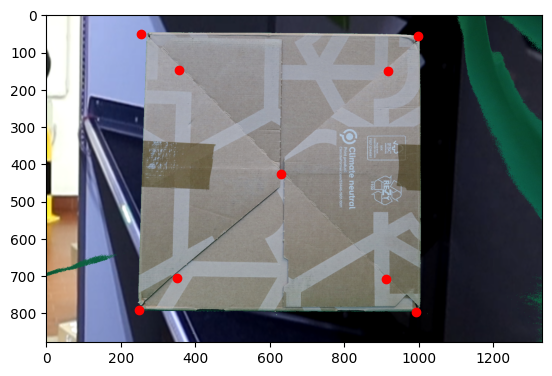

In [ ]:
result= cv2.cvtColor(image-masked, cv2.COLOR_HSV2RGB)
points=rescale_points(cropsize, points)
masked = cv2.bitwise_and(crop,crop, mask=mask)
cutout=masked+result
plt.imshow(cutout)
for p in points:
    plt.plot(p[0],int(cropsize*0.66)-p[1], 'ro')

plt.show()

In [ ]:
def shift_points(w, h, points):
    new_points=[]
    for p in points:
       new_points.append([p[0]+w,int(cropsize*0.66)-p[1]+h])
    return np.array(new_points)
       

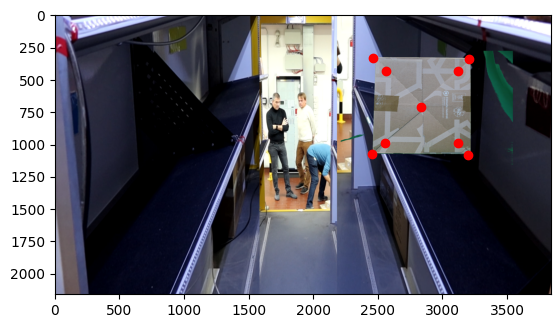

In [ ]:
background[h1:h1+int(cropsize*0.66),w1:w1+cropsize,:]=cutout
plt.imshow(background)
points=shift_points(w1, h1,points)
for p in points:
    plt.plot(p[0],p[1], 'ro')
plt.show()

# print(points[0][1], h1, cropsize*0.66)

In [251]:
l=os.listdir("/apollo/mle/Datasets/backgrounds_ford/")
print(l[0])
img_1=cv2.imread("/apollo/mle/Datasets/backgrounds_ford/"+l[0])
img_2=cv2.imread("/apollo/mle/Datasets/backgrounds_ford/"+l[1])
img_1=cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
cv2.imwrite("/apollo/mle/Datasets/backgrounds_ford/"+l[0], img_1)
img_2=cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
cv2.imwrite("/apollo/mle/Datasets/backgrounds_ford/"+l[1], img_2)

background1.png


True